In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
import inspect
from datetime import datetime
import seaborn as sns
import glob
from os.path import basename
sns.set_context('poster')

In [2]:
# Make your word tokenizer. We don't care about punct.
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+') 

In [153]:
biglist = []

In [154]:
speeches = glob.glob('data/transcripts/*')
for s in speeches:
    print basename(s)
    with open(s) as speech:
        text = speech.read()
        tokens = tokenizer.tokenize(text.lower())
        biglist.append([basename(s), tokens])

adams-j
adams-jq
buchanan
buren
bush-g
bush-gw
carter
cleveland
clinton
coolidge
eisenhower
garfield
grant
harding
harrison-b
harrison-w
hayes
hoover
jackson
jefferson
johnson-lb
kennedy
lincoln
madison
mckinley
monroe
nixon
obama
pierce
polk
reagan
roosevelt-fd
roosevelt-t
taft
taylor
truman
trump
washington
wilson


In [155]:
df_all = pandas.DataFrame(biglist)
df_all.columns = ['president', 'tokens']
#df.to_csv("data/tokenized-speeches.csv")

In [156]:
df.head()
len(df)

12

In [8]:
df['word_count'] = df['tokens'].apply(lambda x: len(x))

In [10]:
df.word_count.describe()

count      39.000000
mean     2677.358974
std      1507.966258
min       991.000000
25%      1542.500000
50%      2337.000000
75%      3503.000000
max      8465.000000
Name: word_count, dtype: float64

In [11]:
df.sort_values('word_count', ascending=True)

,president,tokens,word_count
32,roosevelt-t,"[My, fellow, citizens, no, people, on, earth, ...",991
34,taylor,"[Elected, by, the, American, people, to, the, ...",1091
18,jackson,"[About, to, undertake, the, arduous, duties, t...",1126
12,grant,"[Citizens, of, the, United, States, Your, suff...",1132
23,madison,"[Unwilling, to, depart, from, examples, of, th...",1181
6,carter,"[For, myself, and, for, our, Nation, I, want, ...",1229
21,kennedy,"[Vice, President, Johnson, Mr, Speaker, Mr, Ch...",1368
37,washington,"[Fellow, Citizens, of, the, Senate, and, of, t...",1431
36,trump,"[Chief, Justice, Roberts, President, Carter, P...",1467
20,johnson-lb,"[My, fellow, countrymen, on, this, occasion, t...",1496


In [13]:
df[df.president=='trump']

,president,tokens,word_count
36,trump,"[Chief, Justice, Roberts, President, Carter, P...",1467


In [12]:
df[['president', 'word_count']].to_csv('data/president_word_count.csv')

### Read in CSV with date-- this was joined manually.

In [14]:
df_with_date = pandas.read_csv('data/name-date-wc.csv',index_col=False)

In [15]:
df_with_date.sort_values('word_count', ascending=False)[:10]

,president,first-term,word_count
0,Harrison,1889,8465
1,Taft,1909,5442
2,Polk,1845,4815
3,Harrison,1841,4407
4,Coolidge,1925,4056
5,Reagan,1981,4041
6,McKinley,1897,3977
7,Buren,1837,3844
8,Hoover,1929,3766
9,Lincoln,1861,3631


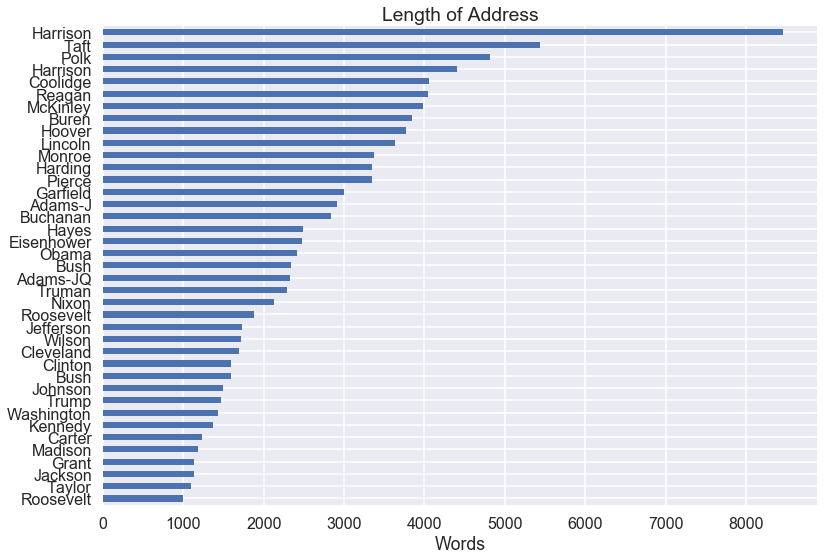

In [39]:
df_with_date.sort_values('word_count').plot(x='president',
                                            y='word_count', 
                                            kind='barh',
                                            legend=None)
plt.title('Length of Address')
plt.xlabel('Words') 
plt.ylabel("")
plt.savefig('figs/length-vs-president-sorted.png')

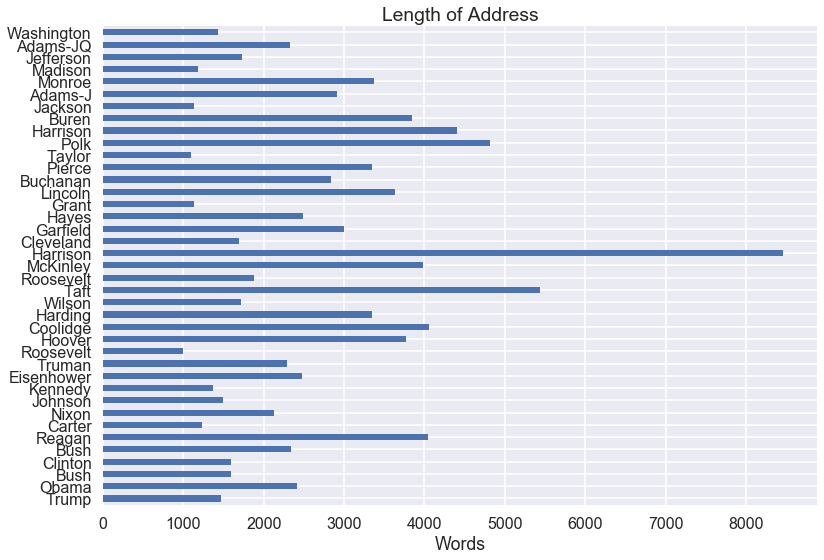

In [17]:
df_with_date.sort_values('first-term', ascending=False).plot(x='president',
                                            y='word_count', 
                                            kind='barh',
                                            legend=None)
plt.title('Length of Address')
plt.xlabel('Words') 
plt.ylabel("")
#plt.savefig('figs/length-vs-president.png')

## Texty stuff

In [19]:
## DONT TOKENIZE HERE....
untokenized = []
speeches = glob.glob('data/transcripts/*')
for s in speeches:
    print basename(s)
    with open(s) as speech:
        text = speech.read() 
        untokenized.append([basename(s), text])

raw = pandas.DataFrame(untokenized)
raw.columns = ['president', 'text']
raw.to_csv("data/raw-speeches.csv")

adams-j
adams-jq
buchanan
buren
bush-g
bush-gw
carter
cleveland
clinton
coolidge
eisenhower
garfield
grant
harding
harrison-b
harrison-w
hayes
hoover
jackson
jefferson
johnson-lb
kennedy
lincoln
madison
mckinley
monroe
nixon
obama
pierce
polk
reagan
roosevelt-fd
roosevelt-t
taft
taylor
truman
trump
washington
wilson


In [20]:
raw.head()

,president,text
0,adams-j,"When it was first perceived, in early times, t..."
1,adams-jq,In compliance with an usage coeval with the ex...
2,buchanan,Fellow-Citizens:\n\nI appear before you this d...
3,buren,The practice of all my predecessors imposes on...
4,bush-g,"Mr. Chief Justice, Mr. President, Vice Preside..."


In [21]:
from textstat.textstat import textstat

In [43]:
raw['fk_grade'] = raw.text.apply(lambda x: textstat.flesch_kincaid_grade(x))
raw['readability'] = raw.text.apply(lambda x: textstat.flesch_reading_ease(x))

In [45]:
raw[['president', 'fk_grade', 'readability']].to_csv('data/fk-grade-readability.csv')

In [26]:
raw.fk_grade.describe()

count    39.000000
mean     14.156410
std       5.386181
min       6.000000
25%      10.300000
50%      12.600000
75%      18.100000
max      27.500000
Name: fk_grade, dtype: float64

## Now with all fields

In [56]:
joined = pandas.read_csv('data/name-date-wc-grade-readability.csv')

In [57]:
joined.head()

,president,first-term,word_count,fk_grade,readability
0,Trump,2017,1467,8.0,64.71
1,Obama,2009,2411,9.5,66.07
2,Bush-GW,2001,1589,9.1,61.67
3,Clinton,1993,1596,8.7,62.68
4,Bush-G,1989,2337,6.0,80.62


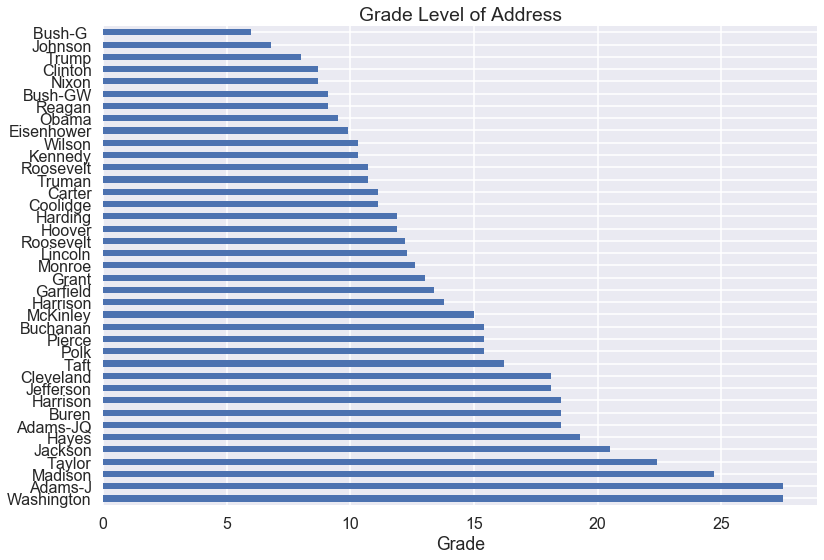

In [58]:
joined.sort_values('fk_grade', ascending=False).plot(x='president',
                                            y='fk_grade', 
                                            kind='barh',
                                            legend=None)
plt.title('Grade Level of Address')
plt.xlabel('Grade') 
plt.ylabel("")
plt.savefig('figs/grade-level.png')

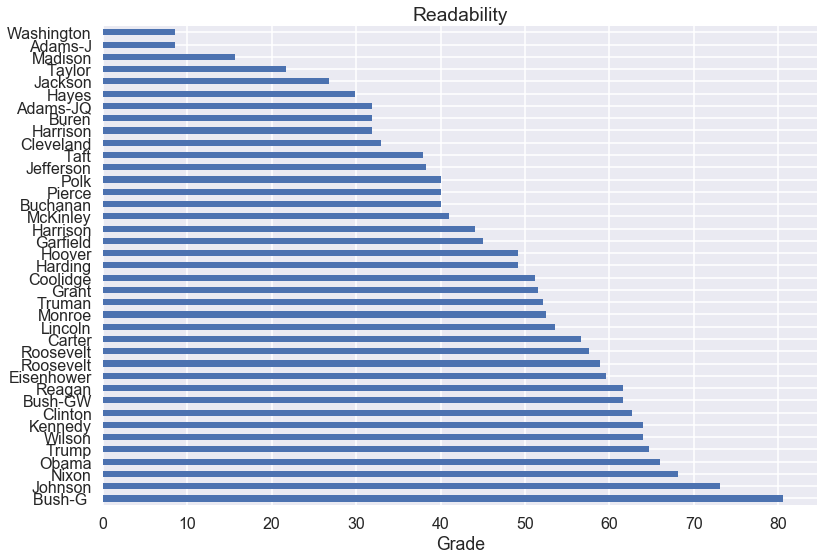

In [59]:
joined.sort_values('readability', ascending=False).plot(x='president',
                                            y='readability', 
                                            kind='barh',
                                            legend=None)
plt.title('Readability')
plt.xlabel('Grade') 
plt.ylabel("")
#plt.savefig('figs/grade-level.png')

## Just modern prezzies

In [78]:
subset = joined.sort_values('first-term', ascending=False)[:10]
subset.to_csv('data/last-10-presidents.csv')

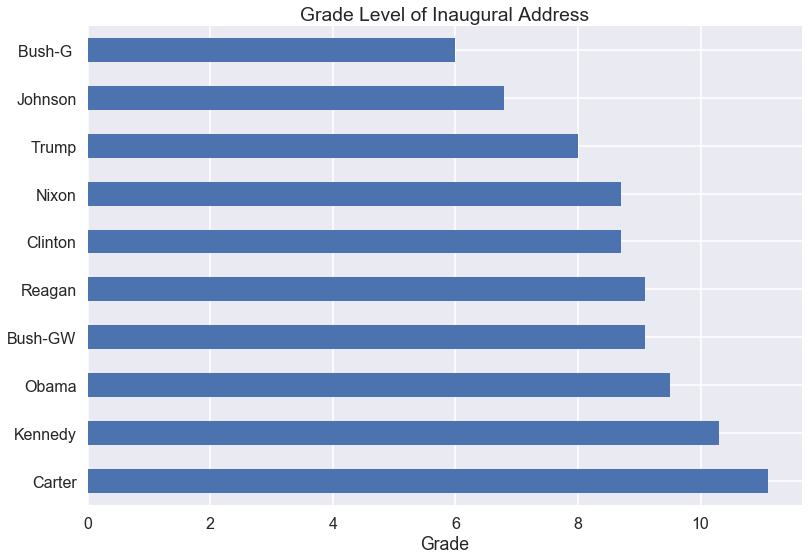

In [75]:
subset.sort_values('fk_grade', ascending=False).plot(x='president',
                                            y='fk_grade', 
                                            kind='barh',
                                            legend=None)
plt.title('Grade Level of Inaugural Address')
plt.xlabel('Grade') 
plt.ylabel("")
plt.savefig('figs/grade-level-subset.png')

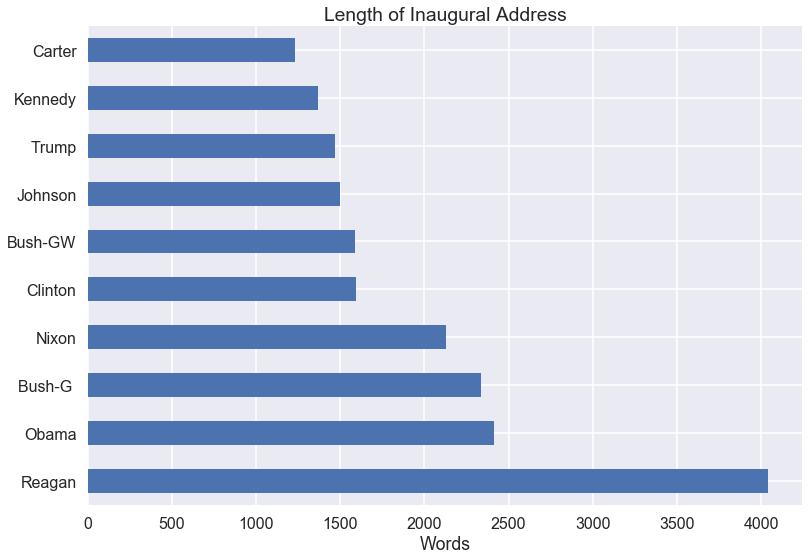

In [77]:
subset.sort_values('word_count', ascending=False).plot(x='president',
                                            y='word_count', 
                                            kind='barh',
                                            legend=None)
plt.title('Length of Inaugural Address')
plt.xlabel('Words') 
plt.ylabel("")
plt.savefig('figs/word-count-subset.png')

In [84]:
subset.sort_values('fk_grade', ascending=True).fk_grade

4     6.0
8     6.8
0     8.0
3     8.7
7     8.7
2     9.1
5     9.1
1     9.5
9    10.3
6    11.1
Name: fk_grade, dtype: float64

## TF-IDF

In [116]:
import math
from textblob import TextBlob as tb

def tf(word, blob):
    return blob.words.count(word) / len(blob.words)

def n_containing(word, bloblist):
    return sum(1 for blob in bloblist if word in blob.words)

def idf(word, bloblist):
    return math.log(len(bloblist) / (1 + n_containing(word, bloblist)))

def tfidf(word, blob, bloblist):
    return tf(word, blob) * idf(word, bloblist)

In [97]:
joined_10 = pandas.merge(raw, subset, left_on='fk_grade', right_on='fk_grade')

In [99]:
joined_10 = joined_10[['president_x', 'text','fk_grade','first-term', 'word_count']]

In [101]:
joined_10.columns = ['president', 'text', 'fk_grade', 'first_term', 'word_count']

In [105]:
joined_10 = joined_10.drop_duplicates('president')

In [106]:
joined_10

,president,text,fk_grade,first_term,word_count
0,bush-g,"Mr. Chief Justice, Mr. President, Vice Preside...",6.0,1989,2337
1,bush-gw,"President Clinton, distinguished guests and my...",9.1,2001,1589
3,reagan,"Senator Hatfield, Mr. Chief Justice, Mr. Presi...",9.1,2001,1589
5,carter,"For myself and for our Nation, I want to thank...",11.1,1977,1229
6,coolidge,My Countrymen:\n\nNo one can contemplate curre...,11.1,1977,1229
7,clinton,My fellow citizens :\n\nToday we celebrate the...,8.7,1993,1596
9,nixon,"Senator Dirksen, Mr. Chief Justice, Mr. Vice P...",8.7,1993,1596
11,johnson-lb,"My fellow countrymen, on this occasion, the oa...",6.8,1965,1496
12,kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",10.3,1961,1368
13,wilson,There has been a change of government. It beg...,10.3,1961,1368


In [ ]:
bloblist = [tb(t) for t in joined_10.text]
for i, blob in enumerate(bloblist):
    print("Top words in document {}".format(i + 1))
    scores = {word: tfidf(word, blob, bloblist) for word in blob.words}
    sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    for word, score in sorted_words[:3]:
        print("\tWord: {}, TF-IDF: {}".format(word, round(score, 5)))

In [121]:
 joined_10.to_csv("data/last-10-all-cols.csv")

 ## AMERICA INDEX

In [127]:
df = pandas.read_csv('data/last-10-all-cols.csv')
df.head()

,Unnamed: 0,president,text,fk_grade,first_term,word_count
0,0,bush-g,"Mr. Chief Justice, Mr. President, Vice Preside...",6.0,1989,2337
1,1,bush-gw,"President Clinton, distinguished guests and my...",9.1,2001,1589
2,3,reagan,"Senator Hatfield, Mr. Chief Justice, Mr. Presi...",9.1,2001,1589
3,5,carter,"For myself and for our Nation, I want to thank...",11.1,1977,1229
4,6,coolidge,My Countrymen:\n\nNo one can contemplate curre...,11.1,1977,1229


In [136]:
df['tokens'] = df.text.apply(lambda x: tokenizer.tokenize(x.lower()))

In [137]:
from collections import Counter

In [141]:
df['america_ct'] = df.tokens.apply(lambda x: Counter(x)['america'])

In [145]:
df.sort_values('america_ct', ascending=False)

,Unnamed: 0,president,text,fk_grade,first_term,word_count,tokens,counts,america_ct
11,15,trump,"\nChief Justice Roberts, President Carter, Pre...",8.0,2017,1467,"[chief, justice, roberts, president, carter, p...",20,20
5,7,clinton,My fellow citizens :\n\nToday we celebrate the...,8.7,1993,1596,"[my, fellow, citizens, today, we, celebrate, t...",18,18
2,3,reagan,"Senator Hatfield, Mr. Chief Justice, Mr. Presi...",9.1,2001,1589,"[senator, hatfield, mr, chief, justice, mr, pr...",17,17
1,1,bush-gw,"President Clinton, distinguished guests and my...",9.1,2001,1589,"[president, clinton, distinguished, guests, an...",11,11
10,14,obama,My fellow citizens:\n\nI stand here today humb...,9.5,2009,2411,"[my, fellow, citizens, i, stand, here, today, ...",10,10
4,6,coolidge,My Countrymen:\n\nNo one can contemplate curre...,11.1,1977,1229,"[my, countrymen, no, one, can, contemplate, cu...",8,8
0,0,bush-g,"Mr. Chief Justice, Mr. President, Vice Preside...",6.0,1989,2337,"[mr, chief, justice, mr, president, vice, pres...",7,7
6,9,nixon,"Senator Dirksen, Mr. Chief Justice, Mr. Vice P...",8.7,1993,1596,"[senator, dirksen, mr, chief, justice, mr, vic...",6,6
7,11,johnson-lb,"My fellow countrymen, on this occasion, the oa...",6.8,1965,1496,"[my, fellow, countrymen, on, this, occasion, t...",3,3
3,5,carter,"For myself and for our Nation, I want to thank...",11.1,1977,1229,"[for, myself, and, for, our, nation, i, want, ...",2,2


In [157]:
df_all

,president,tokens
0,adams-j,"[when, it, was, first, perceived, in, early, t..."
1,adams-jq,"[in, compliance, with, an, usage, coeval, with..."
2,buchanan,"[fellow, citizens, i, appear, before, you, thi..."
3,buren,"[the, practice, of, all, my, predecessors, imp..."
4,bush-g,"[mr, chief, justice, mr, president, vice, pres..."
5,bush-gw,"[president, clinton, distinguished, guests, an..."
6,carter,"[for, myself, and, for, our, nation, i, want, ..."
7,cleveland,"[fellow, citizens, in, the, presence, of, this..."
8,clinton,"[my, fellow, citizens, today, we, celebrate, t..."
9,coolidge,"[my, countrymen, no, one, can, contemplate, cu..."


In [177]:
df_all['america_ct'] = df_all.tokens.apply(lambda x: Counter(x)['america'])
df_all['american_s_ct'] = df_all.tokens.apply(lambda x: Counter(x)['american'] + Counter(x)['americans'])
df_all['america_cans_ct'] = df_all.tokens.apply(lambda x: Counter(x)['america'] + Counter(x)['american'] + Counter(x)['americans'])
df_all[['president', 'america_ct', 'america_cans_ct', 'american_s_ct']].sort_values('america_ct', ascending=False)

,president,america_ct,america_cans_ct,american_s_ct
36,trump,20,35,15
8,clinton,18,31,13
30,reagan,17,36,19
13,harding,15,24,9
5,bush-gw,11,20,9
27,obama,10,15,5
9,coolidge,8,11,3
4,bush-g,7,11,4
26,nixon,6,10,4
17,hoover,6,13,7


In [169]:
df_all[['president', 'america_ct', 'america_cans_ct']].to_csv('data/america-count-ALL-PRES.csv')

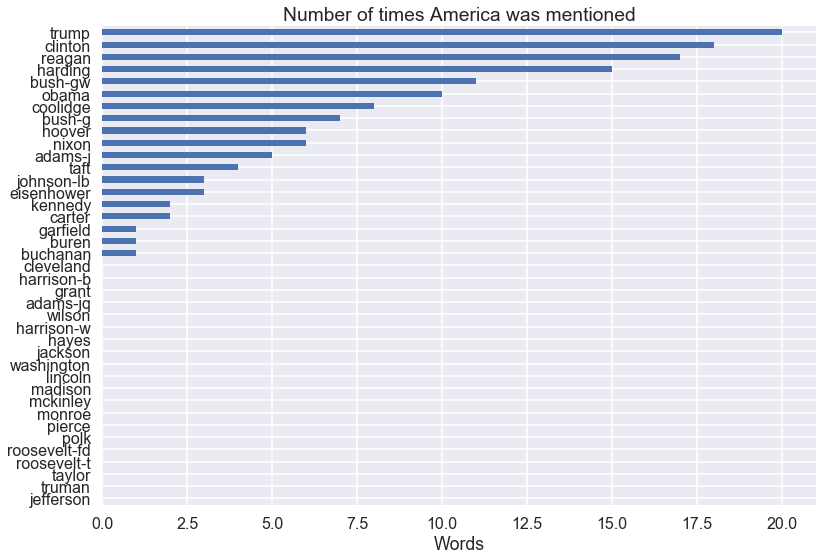

In [176]:
df_all[['president', 'america_ct', 'america_cans_ct']].sort_values('america_ct', ascending=True).plot(x='president',
                                            y='america_ct', 
                                            kind='barh',
                                            legend=None)
plt.title('Number of times America was mentioned')
plt.xlabel('Words') 
plt.ylabel("")
plt.savefig('figs/america-count.png')

In [ ]:
df_a